In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load your sample data
df = pd.read_csv("cleaned_fraud_dataset_ready.csv") 

In [3]:
#perform EDA to understand the dataset
print(df.head())
print(df.info())


                 product_description  declared_code  weight_kg  value_usd  \
0                       Cocoa powder             18      15.77     441.60   
1                       Cocoa powder             18      32.46     132.88   
2                      Fresh bananas              8       5.55     667.23   
3      Fresh Atlantic salmon fillets              2      42.68      39.43   
4  Vegetable cooking oil (sunflower)             15       4.47     960.18   

   country      importer  declared_value_usd  tax_paid_mad  expected_tax_rate  \
0    China  Importer_886              441.60        353.28               0.08   
1   Canada  Importer_499              132.88        106.30               0.08   
2   France  Importer_134              667.23        333.62               0.05   
3  Morocco  Importer_484               39.43         55.20               0.14   
4   Turkey  Importer_840              960.18        864.16               0.09   

   is_fraud  
0         0  
1         0  
2       

In [16]:
#df_clean = df.copy()
df = pd.get_dummies(df_clean, columns=["product_description"], drop_first=True)

In [21]:
#importing StandardScaler to standardise the features
from sklearn.preprocessing import StandardScaler

#drop unnecessary columns
df_clean = df.drop(['importer'], axis=1)

In [23]:
#scale the numerical columns
scaler = StandardScaler()
numerical_columns = ['weight_kg', 'value_usd', 'declared_value_usd', 'tax_paid_mad', 'expected_tax_rate']
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

In [24]:
#display the cleaned dataset
df_clean.head()

,declared_code,weight_kg,value_usd,country,declared_value_usd,tax_paid_mad,expected_tax_rate,is_fraud,product_description_Cocoa powder,product_description_Dried fish flakes,product_description_Fresh Atlantic salmon fillets,product_description_Fresh bananas,product_description_Frozen shrimp tails,product_description_Live ornamental plants,product_description_Refined cane sugar,product_description_Roasted coffee beans,product_description_Vegetable cooking oil (sunflower)
0,18,-0.686991,-0.242062,China,-0.242062,-0.341380,-0.322320,0,True,False,False,False,False,False,False,False,False
1,18,0.493410,-1.333448,Canada,-1.333448,-1.098866,-0.322320,0,True,False,False,False,False,False,False,False,False
2,8,-1.409801,0.555585,France,0.555585,-0.401677,-1.199941,0,False,False,False,True,False,False,False,False,False
3,2,1.216220,-1.663813,Morocco,-1.663813,-1.255590,1.432921,0,False,False,True,False,False,False,False,False,False
4,15,-1.486184,1.591222,Turkey,1.591222,1.225485,-0.029780,0,False,False,False,False,False,False,False,False,True


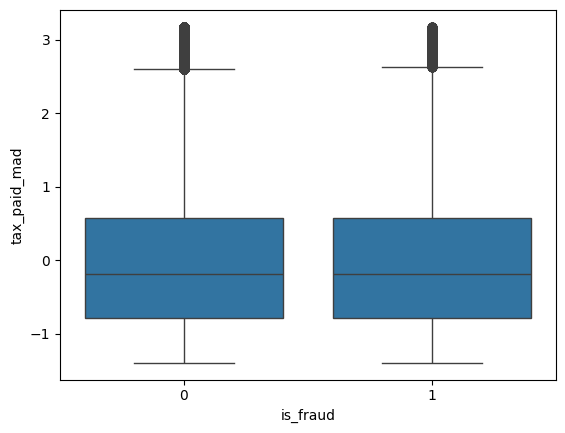

In [40]:
import seaborn as sns
sns.boxplot(x='is_fraud', y='tax_paid_mad', data=X.join(y))
plt.show()

In [28]:
#define features (X) and target (Y)
X = df_clean.drop('is_fraud', axis=1)
y = df_clean['is_fraud']

In [29]:
from sklearn.model_selection import train_test_split

# 10% test, 90% train+val
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# ~10% val, ~80% train
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

In [30]:
#calculate scale_pos_weight to address class imbalance
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

In [32]:
import xgboost as xgb
#initialise the XGboost classifier with scale_pos_weight
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
scale_pos_weight = scale_pos_weight, random_state=42)

In [34]:
# Identify object (categorical) columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode them in both train and val/test sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns (in case encoding created mismatched columns)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [35]:
#train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
#make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report
#Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

#print the evaluation results
print(f"Accuracy with XGBoost:{accuracy_xgb }")
print(f"Classifictaion report with XGBoost: \n", classification_rep_xgb)

Accuracy with XGBoost:1.0
Classifictaion report with XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     90002
           1       1.00      1.00      1.00      9998

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

